In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np

import data_prep_functions as prep

## Data Preparation and Merging

In [2]:
spotlite = prep.aggregate_spotlite_to_state_long('Data/SPOTLITE.csv')


* **2016 Data**: Table 3 - Crime in the United States by State, 2016. Retrieved from the FBI Uniform Crime Reporting (UCR) Program:
https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/tables/table-3

* **2020 Data**: Table 5 - Crime in the United States by State, 2020. Available via the FBI Crime Data Explorer:
https://cde.ucr.cjis.gov/LATEST/webapp/#

In [3]:
crimes_2016 = prep.extract_state_total_crime('Data/table-3.xlsx')
crimes_2020 = prep.extract_state_total_crime('Data/Table_05_Crime_in_the_United_States_by_State_2020.xlsx')

In [4]:
crimes = pd.concat([crimes_2016, crimes_2020])
crimes.describe()

3,YEAR,POPULATION,TOTAL_CRIME
count,102.000000,102.0,102.0
mean,2018.000000,6398153.294118,166345.45098
std,2.009877,7273752.789691,198709.704168
min,2016.000000,582328.0,8667.0
25%,2016.000000,1795318.5,41563.5
50%,2018.000000,4457112.5,120965.0
75%,2020.000000,7388050.75,200628.25
max,2020.000000,39368078.0,1176866.0


In [5]:
lemas_2016 = prep.read_lemas('Data/LEMAS2016.tsv')
lemas_2020 = prep.read_lemas('Data/LEMAS2020.tsv')

795 rows from 3499 dropped due to FTSWORN < 1 or survey completion rate below 60%.


In [6]:
lemas = pd.concat([lemas_2020, lemas_2016])
lemas.describe()

,YEAR,FTSWORN,%_FEMALE,%_BLACK,%_HISP,CCRB,CFDBK_POLICY
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,2018.000000,8526.705882,0.116685,0.099935,0.072229,0.151514,0.256872
std,2.009877,11902.323814,0.039757,0.102381,0.085525,0.172908,0.229223
min,2016.000000,286.000000,0.035545,0.002024,0.003981,0.000000,0.000000
25%,2016.000000,2053.750000,0.084703,0.020409,0.021012,0.064928,0.050598
50%,2018.000000,4230.500000,0.113261,0.070359,0.035357,0.099450,0.214769
75%,2020.000000,9489.750000,0.138818,0.132588,0.074635,0.177484,0.408948
max,2020.000000,60466.000000,0.240114,0.528287,0.373749,1.000000,1.000000


In [7]:
merged = lemas.merge(crimes, on=['STATE', 'YEAR'], how='left')
data = merged.merge(spotlite, on=['STATE', 'YEAR'], how='left')

## Distribution Checks and Data Transformation

In [8]:
data.describe()

,YEAR,FTSWORN,%_FEMALE,%_BLACK,%_HISP,CCRB,CFDBK_POLICY,POPULATION,TOTAL_CRIME,USE_OF_FORCE_COUNT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0,102.0,102.000000
mean,2018.000000,8526.705882,0.116685,0.099935,0.072229,0.151514,0.256872,6398153.294118,166345.45098,59.637255
std,2.009877,11902.323814,0.039757,0.102381,0.085525,0.172908,0.229223,7273752.789691,198709.704168,69.649020
min,2016.000000,286.000000,0.035545,0.002024,0.003981,0.000000,0.000000,582328.0,8667.0,2.000000
25%,2016.000000,2053.750000,0.084703,0.020409,0.021012,0.064928,0.050598,1795318.5,41563.5,17.750000
50%,2018.000000,4230.500000,0.113261,0.070359,0.035357,0.099450,0.214769,4457112.5,120965.0,43.000000
75%,2020.000000,9489.750000,0.138818,0.132588,0.074635,0.177484,0.408948,7388050.75,200628.25,74.500000
max,2020.000000,60466.000000,0.240114,0.528287,0.373749,1.000000,1.000000,39368078.0,1176866.0,435.000000


array([[<Axes: xlabel='%_FEMALE', ylabel='%_FEMALE'>,
        <Axes: xlabel='%_BLACK', ylabel='%_FEMALE'>,
        <Axes: xlabel='%_HISP', ylabel='%_FEMALE'>,
        <Axes: xlabel='CCRB', ylabel='%_FEMALE'>,
        <Axes: xlabel='CFDBK_POLICY', ylabel='%_FEMALE'>,
        <Axes: xlabel='USE_OF_FORCE_COUNT', ylabel='%_FEMALE'>],
       [<Axes: xlabel='%_FEMALE', ylabel='%_BLACK'>,
        <Axes: xlabel='%_BLACK', ylabel='%_BLACK'>,
        <Axes: xlabel='%_HISP', ylabel='%_BLACK'>,
        <Axes: xlabel='CCRB', ylabel='%_BLACK'>,
        <Axes: xlabel='CFDBK_POLICY', ylabel='%_BLACK'>,
        <Axes: xlabel='USE_OF_FORCE_COUNT', ylabel='%_BLACK'>],
       [<Axes: xlabel='%_FEMALE', ylabel='%_HISP'>,
        <Axes: xlabel='%_BLACK', ylabel='%_HISP'>,
        <Axes: xlabel='%_HISP', ylabel='%_HISP'>,
        <Axes: xlabel='CCRB', ylabel='%_HISP'>,
        <Axes: xlabel='CFDBK_POLICY', ylabel='%_HISP'>,
        <Axes: xlabel='USE_OF_FORCE_COUNT', ylabel='%_HISP'>],
       [<Axes: xlabel=

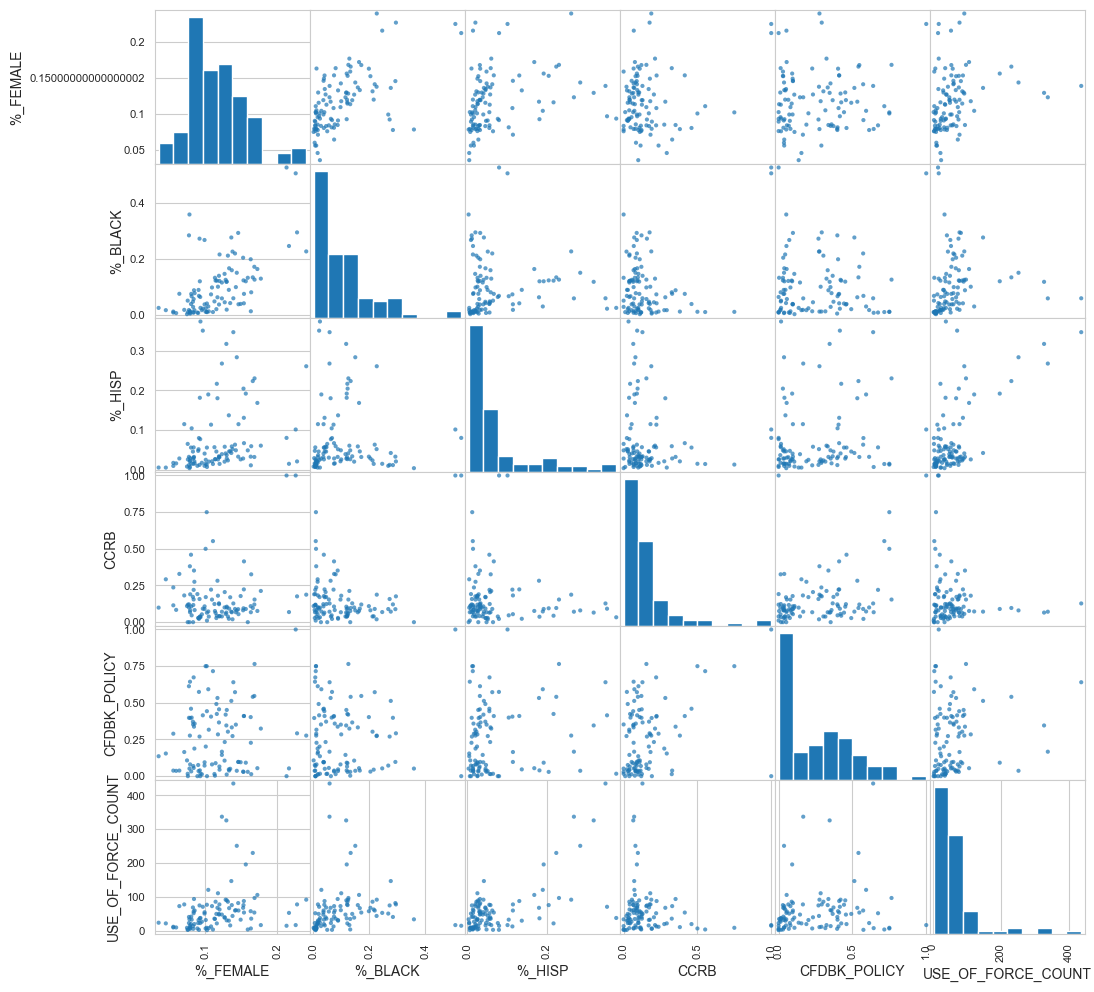

In [9]:
scatter = data.drop(columns = ['YEAR','FTSWORN', 'POPULATION','TOTAL_CRIME'])

#plt.figure(figsize=(8, 8))
scatter_matrix(scatter, alpha=0.7, figsize=(12, 12))

#plt.tight_layout()
#plt.show()

The histograms in  the scatter matrix show that our variables of interest had right-skewed distributions. To reduce the impact of skewness and improve interpretability in visualizations, we applied a log transformation (log1p) to these variables. We also min-max scaled the lethal force metrics to bring them onto a comparable scale.

These transformations will help with visualization and pattern detection in our scatter plots, but will not affect Spearman correlations, which are based on rank rather than the raw values.

In [10]:
# Calculate Lethal Force Rate by Residents or Crimes
data['%_FORCE_TO_RESIDENT'] = data['USE_OF_FORCE_COUNT'] * 100000 / data['POPULATION']
data['%_FORCE_TO_CRIME'] = data['USE_OF_FORCE_COUNT'] * 1000 / data['TOTAL_CRIME']

In [11]:
cols_to_log = [
    '%_FEMALE', '%_BLACK', '%_HISP', 'CCRB',
    'CFDBK_POLICY', '%_FORCE_TO_RESIDENT', '%_FORCE_TO_CRIME'
]

log_transformed = data.copy()
log_transformed[cols_to_log] = log_transformed[cols_to_log].apply(np.log1p)
log_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATE                102 non-null    object 
 1   YEAR                 102 non-null    int64  
 2   FTSWORN              102 non-null    float64
 3   %_FEMALE             102 non-null    float64
 4   %_BLACK              102 non-null    float64
 5   %_HISP               102 non-null    float64
 6   CCRB                 102 non-null    float64
 7   CFDBK_POLICY         102 non-null    float64
 8   POPULATION           102 non-null    Int64  
 9   TOTAL_CRIME          102 non-null    Int64  
 10  STATE_NAME           102 non-null    object 
 11  USE_OF_FORCE_COUNT   102 non-null    int64  
 12  %_FORCE_TO_RESIDENT  102 non-null    Float64
 13  %_FORCE_TO_CRIME     102 non-null    Float64
dtypes: Float64(2), Int64(2), float64(6), int64(2), object(2)
memory usage: 11.7+ KB


In [12]:
log_transformed.describe()

,YEAR,FTSWORN,%_FEMALE,%_BLACK,%_HISP,CCRB,CFDBK_POLICY,POPULATION,TOTAL_CRIME,USE_OF_FORCE_COUNT,%_FORCE_TO_RESIDENT,%_FORCE_TO_CRIME
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0,102.0,102.000000,102.0,102.0
mean,2018.000000,8526.705882,0.109747,0.091332,0.066859,0.132160,0.213083,6398153.294118,166345.45098,59.637255,0.682369,0.327593
std,2.009877,11902.323814,0.035160,0.087081,0.074606,0.127327,0.174862,7273752.789691,198709.704168,69.649020,0.239457,0.11642
min,2016.000000,286.000000,0.034928,0.002022,0.003974,0.000000,0.000000,582328.0,8667.0,2.000000,0.221287,0.120708
25%,2016.000000,2053.750000,0.081306,0.020203,0.020794,0.062907,0.049359,1795318.5,41563.5,17.750000,0.517451,0.246205
50%,2018.000000,4230.500000,0.107293,0.067991,0.034746,0.094810,0.194497,4457112.5,120965.0,43.000000,0.666236,0.309326
75%,2020.000000,9489.750000,0.129991,0.124506,0.071973,0.163380,0.342843,7388050.75,200628.25,74.500000,0.80921,0.398142
max,2020.000000,60466.000000,0.215203,0.424147,0.317544,0.693147,0.693147,39368078.0,1176866.0,435.000000,1.474948,0.658102


In [13]:
log_transformed['STD_FORCE_TO_RESIDENT'] = prep.standardize(log_transformed['%_FORCE_TO_RESIDENT'])
log_transformed['STD_FORCE_TO_CRIME'] = prep.standardize(log_transformed['%_FORCE_TO_CRIME'])

In [14]:
# save clean, non-transformed data
data.to_pickle('Data/data_cleaned.pkl')

In [15]:
# save clean & transformed data
log_transformed.to_pickle('Data/data_log_transformed.pkl')